# Diagnozer_OO

In [1]:
import cv2
import numpy as np
import os
os.chdir("/home/harish/PycharmProjects/Patient_ImageData")

In [2]:
img_rgb = cv2.imread('new2.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


In [3]:
gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,1005,1 )

In [4]:
template = cv2.imread('tempnew2.jpg',0)
w, h = template.shape[::-1]

In [5]:
count = 0

In [6]:
res = cv2.matchTemplate(gaus,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.4#to get more accuracy
loc = np.where( res >= threshold)

In [7]:
f = set()#count of matches
#https://stackoverflow.com/questions/40824445/how-to-count-the-number-of-objects-detected-with-template-matching

In [8]:
from collections import defaultdict
dict_rect = defaultdict(list)

In [9]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    count+=1
    sensitivity = 500
    f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))
    dict_rect[round(pt[0]/sensitivity)].append([pt[0], pt[1]])
# print(dict_rect[1])
cv2.imshow('Detected',img_rgb)


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
# img_org = cv2.imread('test1.jpg')
gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/2,200)
lengh = 1500
ls_x = list()
ls_y = list()
for line in lines:
   for rho,theta in line:
#         ls_rho.append(rho)
#         ls_theta.append(theta)
       a = np.cos(theta)
       b = np.sin(theta)
       
       x0 = a*rho
       y0 = b*rho
       x1 = int(x0 + lengh*(-b))
       y1 = int(y0 + lengh*(a))
       x2 = int(x0 - lengh*(-b))
       y2 = int(y0 - lengh*(a))
       ls_x.append(x0)
       ls_y.append(y0)

ls_y = np.round(ls_y)
ls_y = list(set(ls_y))

ls_x = np.round(ls_x)
ls_x = list(set(ls_x))

df_rho = pd.DataFrame(ls_y)
kmeans = KMeans(n_clusters=11).fit(df_rho)
ls_y  =kmeans.cluster_centers_

df_rho = pd.DataFrame(ls_x)
kmeans = KMeans(n_clusters=9).fit(df_rho)#why?
ls_x  =kmeans.cluster_centers_

for y0 in ls_y:
   cv2.line(img_rgb,(0,y0),(0+img_rgb.shape[1],y0),(0,0,255),2)

for x0 in ls_x:
   cv2.line(img_rgb,(x0,0),(x0,0+img_rgb.shape[1]),(0,0,255),2)

In [11]:
slsy = sorted(ls_y)
slsy

[array([ 217.5]),
 array([ 375.76744186]),
 array([ 746.6]),
 array([ 1000.]),
 array([ 1259.75]),
 array([ 1532.66666667]),
 array([ 1802.77777778]),
 array([ 2057.18181818]),
 array([ 2341.77777778]),
 array([ 2582.]),
 array([ 2872.33333333])]

In [12]:
diff_slsy = [j-i for i, j in zip(slsy[:-1], slsy[1:])]  # or use itertools.izip in py2k
avg_diff_slsy = sum(diff_slsy) / float(len(diff_slsy))

In [13]:
avg_diff_slsy

array([ 265.48333333])

In [14]:
slsx = sorted(ls_x)
slsx
diff_slsx = [j-i for i, j in zip(ls_x[:-1], ls_y[1:])]  # or use itertools.izip in py2k
avg_diff_slsx = sum(diff_slsx) / float(len(diff_slsx))

In [15]:
slsx

[array([ 245.05882353]),
 array([ 677.]),
 array([ 1130.]),
 array([ 1573.85714286]),
 array([ 1991.]),
 array([ 2418.25]),
 array([ 2878.5]),
 array([ 3283.33333333]),
 array([ 3702.33333333])]

In [16]:
avg_diff_slsx

array([-253.71111607])

In [17]:
len(slsx)

9

In [18]:
len(slsy)

11

# how many matches?

In [19]:
#how many matches?
len(f)

10

In [20]:
cv2.imwrite("output.jpg", img_rgb)

True

In [21]:
import matplotlib.pyplot as plt

## Plot for (sample output)

In [22]:
#corner detectino

In [23]:
# Final Statstics:

In [24]:
people =('MON','TUE','WED','THU','FRI','SAT', 'SUN')
rowname = [['E','H'],['F'],['B','C','G'],['H'], ['E'],
           ['B','I'],['F']]

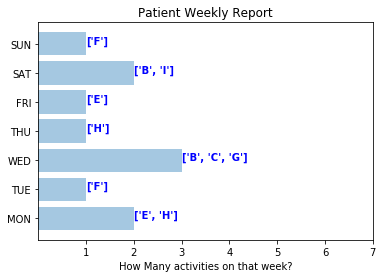

In [25]:
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = [2, 1, 3, 1, 1, 2, 1 ]
error = np.random.rand(len(people))

plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.xticks([1,2,3,4,5,6,7])
plt.yticks(y_pos, people)
plt.xlabel('How Many activities on that week?')
plt.title('Patient Weekly Report')

for i in range(7):
    plt.text(performance[i],y_pos[i],rowname[i], color='blue', fontweight='bold')

plt.savefig('/home/harish/PycharmProjects/Patient_ImageData/analysisoutput', format='svg', dpi=1000)
plt.show()

In [26]:
# y = [160, 167, 137, 18, 120, 36, 155]